In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm.autonotebook import tqdm

C:\Users\Jakub\AppData\Local\Temp\ipykernel_34448\2920178806.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))
data_dir = os.path.join(parent_dir, "data")

In [4]:
if os.path.isfile(
    os.path.join(data_dir, "combined_personality_scaled_sep_columns.json")
):
    print("Reading processed file...")
    data = pd.read_json(
        os.path.join(data_dir, "combined_personality_scaled_sep_columns.json")
    )
else:
    print("Processing and preparing file...")
    data = pd.read_json(os.path.join(data_dir, "combined_personality.json"))
    data["time_of_day"] = pd.cut(
        data["date"].dt.hour,
        bins=[0, 6, 12, 18, 24],
        labels=["Night", "Morning", "Afternoon", "Evening"],
        include_lowest=True,
    )
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_personality = data["personality"].apply(pd.Series)
    df_personality_scaled = pd.DataFrame(
        scaler.fit_transform(df_personality), columns=df_personality.columns
    )
    data = pd.concat([data.drop("personality", axis=1), df_personality_scaled], axis=1)
    data.to_json(
        os.path.join(data_dir, "combined_personality_scaled_sep_columns.json"),
        orient="records",
        indent=4,
        force_ascii=False,
    )
personality_names = [
    "Extroversion",
    "Neuroticism",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
]

Reading processed file...


In [5]:
data.head()

,comment_id,author,date,comment,video_id,is_reply,parent_id,channel,genre,emoji,time_of_day,Extroversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,Ugz1ByKCNN-zcHnFDmt4AaABAg,Yuri Briceño,2023-11-12 19:03:39,It 39 s y good,lDK9QqIzhwk,False,None,bonjovi,metal,['❤️'],Evening,0.220460,0.453638,-0.295520,-0.466538,-0.050153
1,UgzEx14TY3TRXzYiY6F4AaABAg,leslie winchester,2023-11-12 18:12:49,2009 2011 six string in hock prayer still w...,lDK9QqIzhwk,False,None,bonjovi,metal,[],Afternoon,0.078781,0.413282,-0.367067,-0.627122,0.196147
2,UgyyXemVneI7UpYbunt4AaABAg,Jeff Packham,2023-11-12 14:25:41,no talk about club He man woman club Alfalfa ...,lDK9QqIzhwk,False,None,bonjovi,metal,"['🦜', '😎', '😂', '😎', '😂', '❤️', '🎉']",Afternoon,0.265796,0.300490,-0.459456,-0.592001,0.164914
3,UgxnQPStaiTWQqrwtfl4AaABAg,Reto Kaufmann,2023-11-12 13:37:51,Rock and metal radio station it quot shog...,lDK9QqIzhwk,False,None,bonjovi,metal,[],Afternoon,0.434715,0.463218,-0.590318,-0.622466,0.553241
4,UgylFha0XC_D4Amrmb94AaABAg,Thomas Schmutter,2023-11-12 10:35:46,From Bon Living on a Prayer,lDK9QqIzhwk,False,None,bonjovi,metal,['🎉'],Morning,0.027371,0.313941,-0.352803,-0.472401,0.058686


# Analysis of personalities according to part of the day.

In [6]:
morning_data = data[data["time_of_day"] == "Morning"][personality_names]

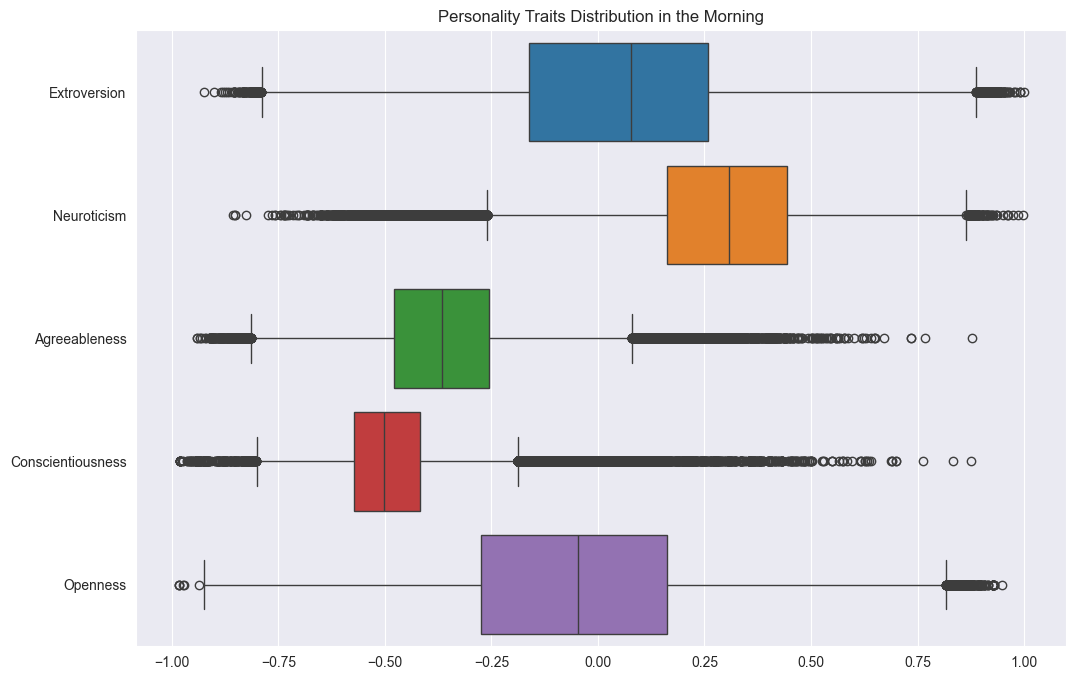

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=morning_data, orient="h")
plt.title("Personality Traits Distribution in the Morning")
plt.show()

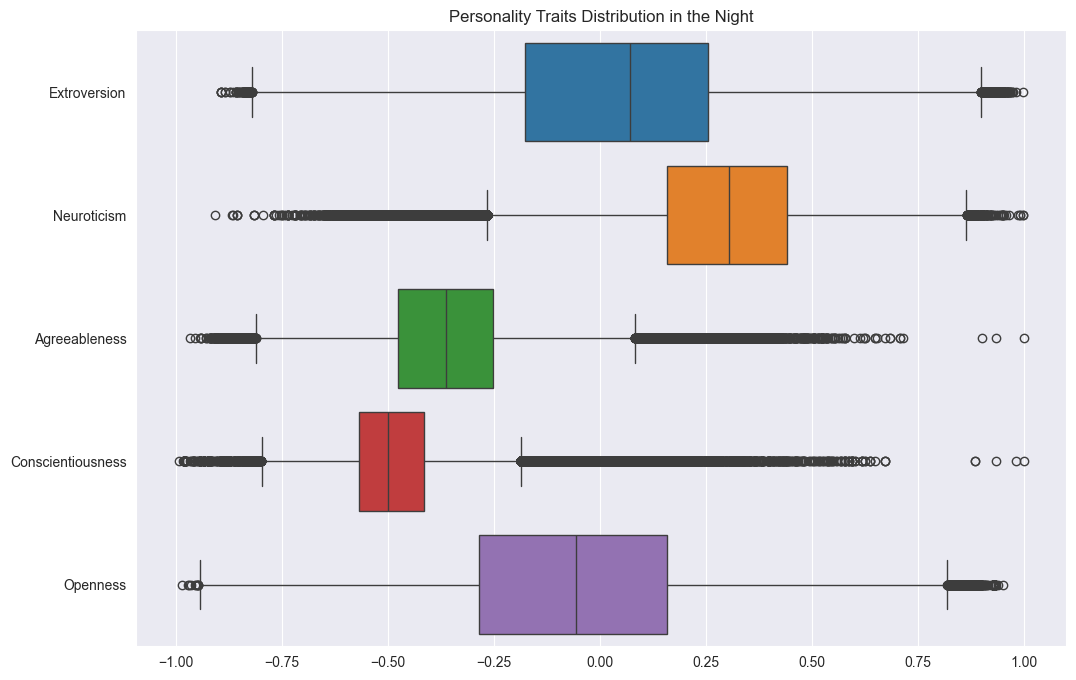

In [8]:
night_data = data[data["time_of_day"] == "Night"][personality_names]
plt.figure(figsize=(12, 8))
sns.boxplot(data=night_data, orient="h")
plt.title("Personality Traits Distribution in the Night")
plt.show()

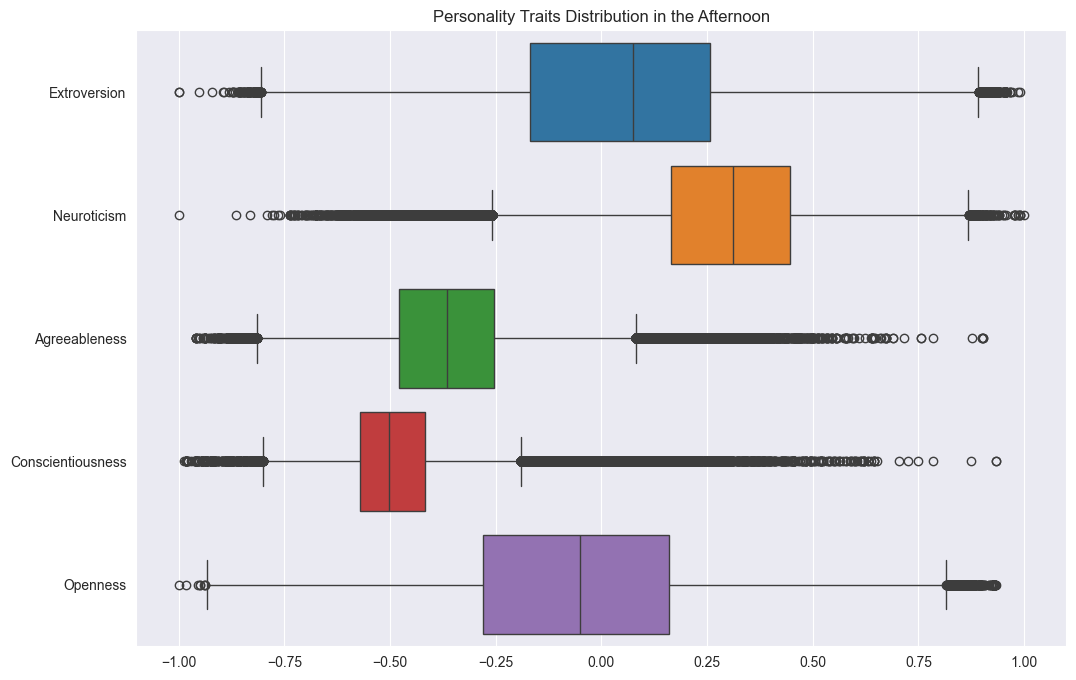

In [9]:
afternoon_data = data[data["time_of_day"] == "Afternoon"][personality_names]
plt.figure(figsize=(12, 8))
sns.boxplot(data=afternoon_data, orient="h")
plt.title("Personality Traits Distribution in the Afternoon")
plt.show()

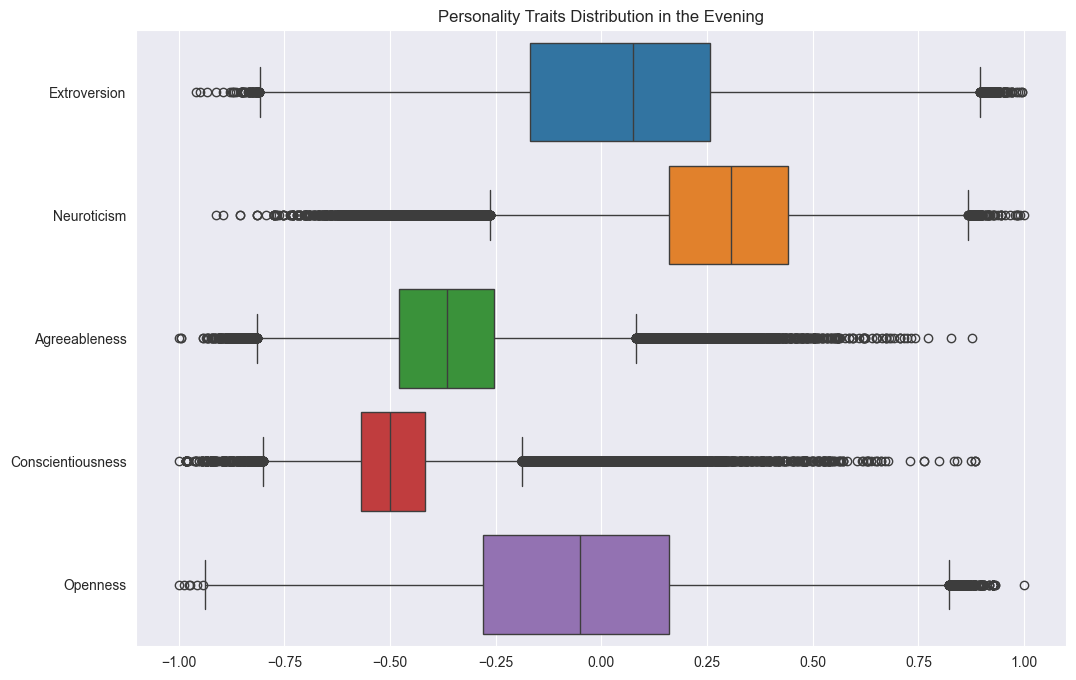

In [10]:
evening_data = data[data["time_of_day"] == "Evening"][personality_names]
plt.figure(figsize=(12, 8))
sns.boxplot(data=evening_data, orient="h")
plt.title("Personality Traits Distribution in the Evening")
plt.show()

# Analysis of personalities according to genre

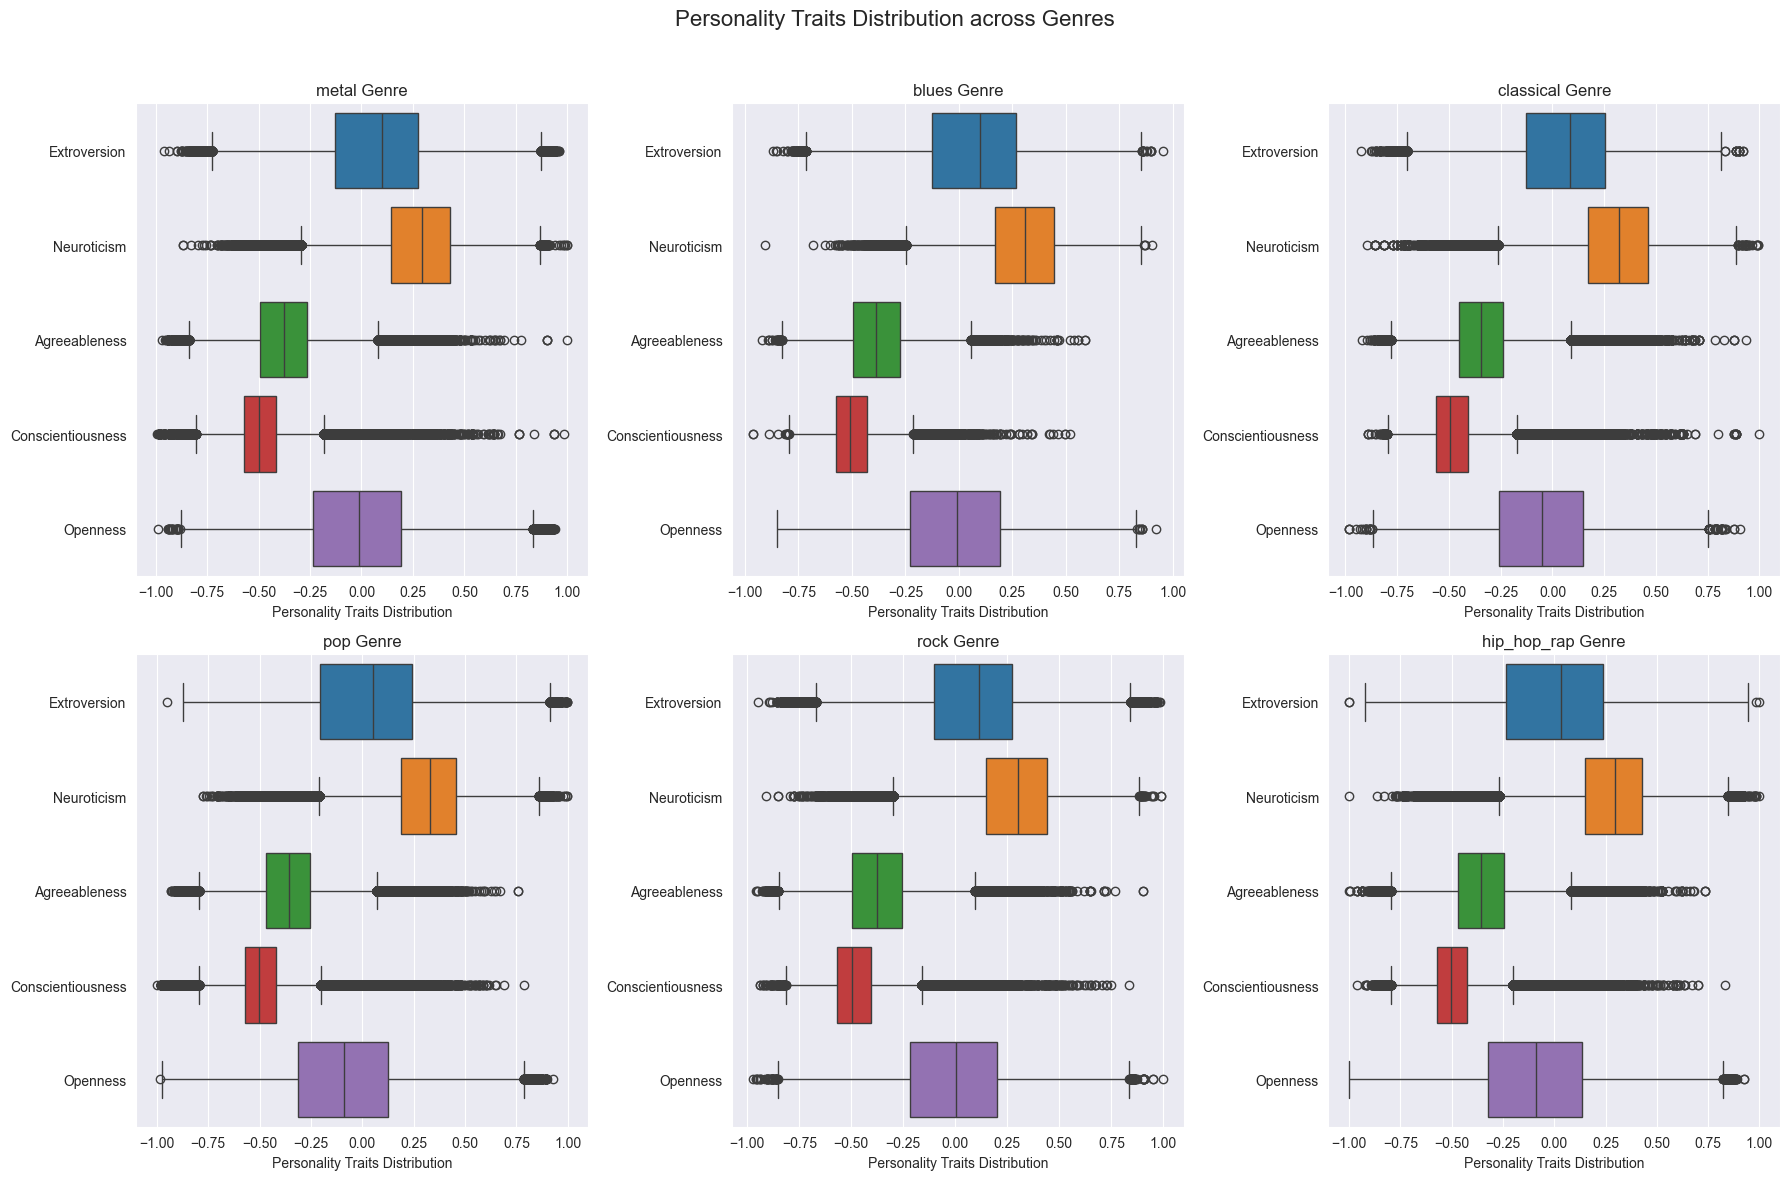

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Personality Traits Distribution across Genres", fontsize=16)
genres = data.genre.unique()
for genre, ax in zip(genres, axes.flatten()):
    genre_data = data[data["genre"] == genre][personality_names]
    sns.boxplot(data=genre_data, orient="h", ax=ax)
    ax.set_title(f"{genre} Genre")
    ax.set_xlabel("Personality Traits Distribution")

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

# Analysis according to artist

Artist printing:   0%|          | 0/32 [00:00<?, ?it/s]

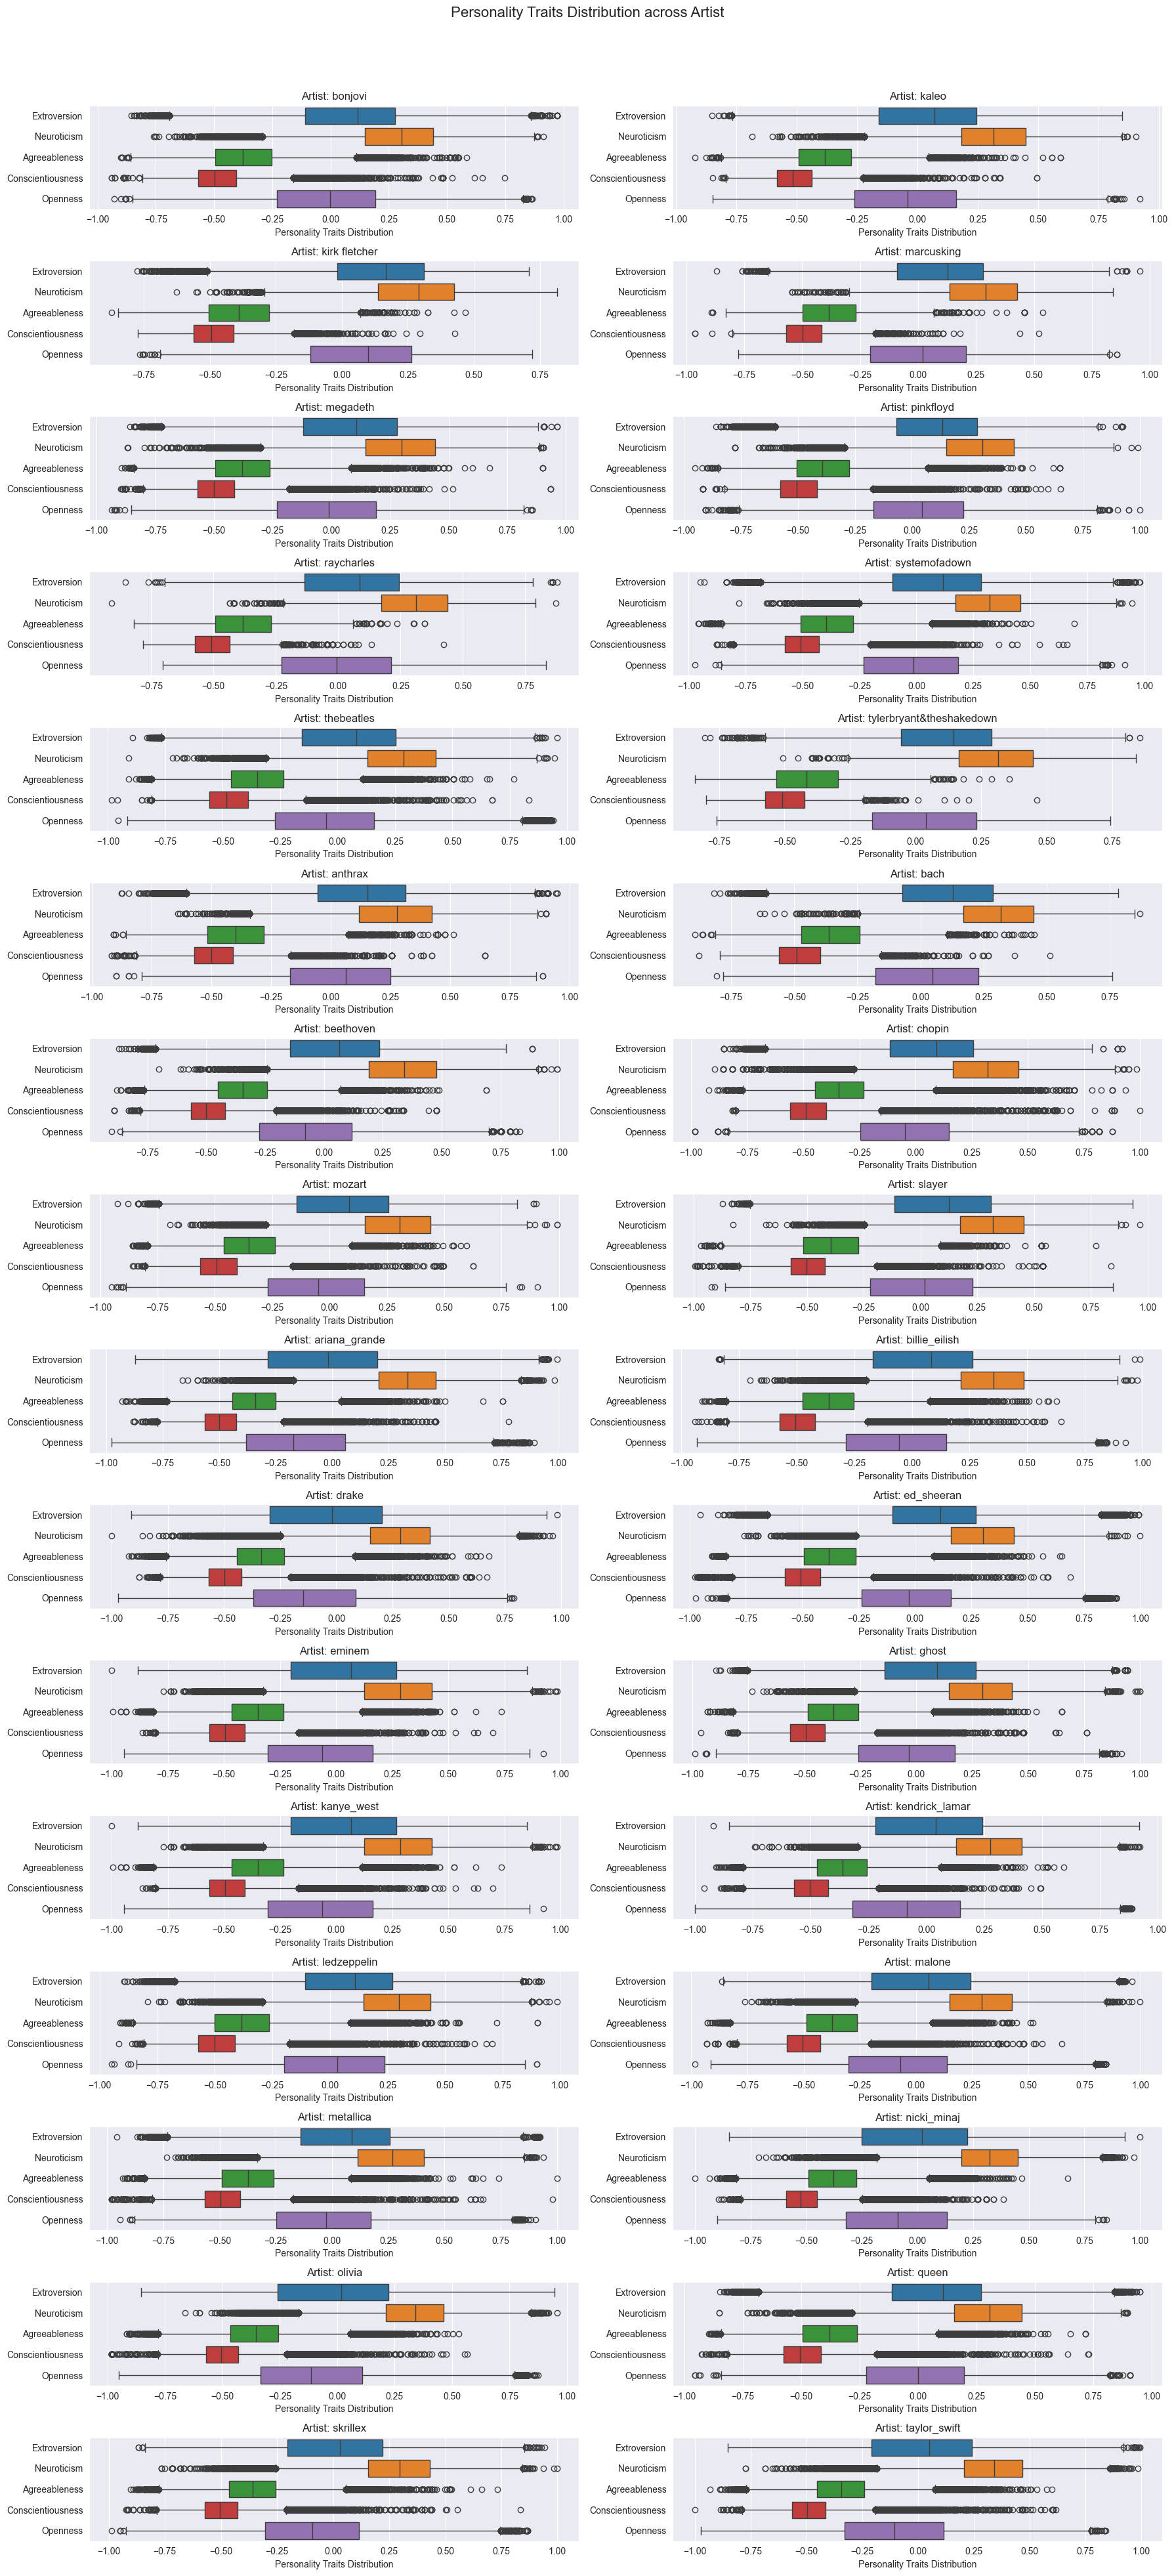

In [18]:
channels = data.channel.unique()
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(18, 40))
fig.suptitle("Personality Traits Distribution across Artist", fontsize=16)

for channel, ax in tqdm(
    zip(channels, axes.flatten()),
    total=len(channels),
    desc="Artist printing",
    colour="green",
):
    channel_data = data[data["channel"] == channel][personality_names]
    sns.boxplot(data=channel_data, orient="h", ax=ax)
    ax.set_title(f"Artist: {channel}")
    ax.set_xlabel("Personality Traits Distribution")

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.show()

# MBTI personality

In [4]:
data = pd.read_json(os.path.join(data_dir, "bert_personality_3_comments.json"))

In [5]:
data.head()

,comment_id,author,date,comment,video_id,is_reply,parent_id,channel,genre,emoji,emotion,mbti
0,UgxnQPStaiTWQqrwtfl4AaABAg,Reto Kaufmann,2023-11-12 13:37:51+00:00,Rock and metal radio station it quot shog...,lDK9QqIzhwk,False,None,bonjovi,metal,[],joy,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.329..."
1,UgzN9yjcR6LLNOJimDF4AaABAg,Bradley Smith,2023-11-10 01:21:47+00:00,Ah on the 39 dream 39 had hair like that ...,lDK9QqIzhwk,False,None,bonjovi,metal,[],excitement,"{'type': ['I', 'N', 'F', 'J'], 'preds': [0.180..."
2,UgwkkcP9918pZNhQps14AaABAg,pablo estevez,2023-11-09 17:57:19+00:00,a the most epic appearance in the history of...,lDK9QqIzhwk,False,None,bonjovi,metal,['://www.youtube.com/watch?v=lDK9QqIzhwk&amp;t...,admiration,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.274..."
3,Ugx-vEVIJjo_bE_cd5p4AaABAg,Y P,2023-11-08 15:03:12+00:00,Almost 40 and we 39 re still living on a pr...,lDK9QqIzhwk,False,None,bonjovi,metal,"['🔥', '🤟🏼']",neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.216..."
4,UgxH9P4WwWwcJKFBvf14AaABAg,Romantic Melodies,2023-11-08 03:08:15+00:00,One of the main a lot of those 80s love are so...,lDK9QqIzhwk,False,None,bonjovi,metal,[],neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.375..."


In [6]:
# Splitting 'mbti' column into 'type' and 'preds'
import numpy as np

classes = {
    0: {0: "I", 1: "E"},  # axis 1
    1: {0: "N", 1: "S"},  # axis 2
    2: {0: "T", 1: "F"},  # axis 3
    3: {0: "J", 1: "P"},
}


def map_to_one_type_personality(row):
    new_df = {}
    for axis, (t, p) in enumerate(zip(row["type"], row["preds"])):
        key = classes[axis][
            0
        ]  # zmiana do jednych kluczy, czyli do INTJ i probable obok tego
        new_df[key] = p
    return new_df


def change_dict(row):
    new_df = {}
    for axis, (t, p) in enumerate(zip(row["type"], row["preds"])):
        pred = int(np.round(p))
        new_df[classes[axis][pred]] = p
    return new_df


data["mapped_personalities"] = data.apply(
    lambda row: map_to_one_type_personality(row.mbti), axis=1
)

In [7]:
data.head()

,comment_id,author,date,comment,video_id,is_reply,parent_id,channel,genre,emoji,emotion,mbti,mapped_personalities
0,UgxnQPStaiTWQqrwtfl4AaABAg,Reto Kaufmann,2023-11-12 13:37:51+00:00,Rock and metal radio station it quot shog...,lDK9QqIzhwk,False,None,bonjovi,metal,[],joy,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.329...","{'I': 0.3293154538, 'N': 0.194634214, 'T': 0.2..."
1,UgzN9yjcR6LLNOJimDF4AaABAg,Bradley Smith,2023-11-10 01:21:47+00:00,Ah on the 39 dream 39 had hair like that ...,lDK9QqIzhwk,False,None,bonjovi,metal,[],excitement,"{'type': ['I', 'N', 'F', 'J'], 'preds': [0.180...","{'I': 0.18082059920000002, 'N': 0.0788382143, ..."
2,UgwkkcP9918pZNhQps14AaABAg,pablo estevez,2023-11-09 17:57:19+00:00,a the most epic appearance in the history of...,lDK9QqIzhwk,False,None,bonjovi,metal,['://www.youtube.com/watch?v=lDK9QqIzhwk&amp;t...,admiration,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.274...","{'I': 0.2740464509, 'N': 0.2224584222, 'T': 0...."
3,Ugx-vEVIJjo_bE_cd5p4AaABAg,Y P,2023-11-08 15:03:12+00:00,Almost 40 and we 39 re still living on a pr...,lDK9QqIzhwk,False,None,bonjovi,metal,"['🔥', '🤟🏼']",neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.216...","{'I': 0.2167623639, 'N': 0.0809708759, 'T': 0...."
4,UgxH9P4WwWwcJKFBvf14AaABAg,Romantic Melodies,2023-11-08 03:08:15+00:00,One of the main a lot of those 80s love are so...,lDK9QqIzhwk,False,None,bonjovi,metal,[],neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.375...","{'I': 0.3755761087, 'N': 0.1569068134, 'T': 0...."


In [8]:
df_personality = data["mapped_personalities"].apply(pd.Series)

In [9]:
df_personality.head()

,I,N,T,J
0,0.329315,0.194634,0.252400,0.627517
1,0.180821,0.078838,0.819639,0.457863
2,0.274046,0.222458,0.465491,0.549524
3,0.216762,0.080971,0.837853,0.583904
4,0.375576,0.156907,0.564918,0.640366


In [10]:
data = pd.concat([data.drop("mapped_personalities", axis=1), df_personality], axis=1)
data.head()

,comment_id,author,date,comment,video_id,is_reply,parent_id,channel,genre,emoji,emotion,mbti,I,N,T,J
0,UgxnQPStaiTWQqrwtfl4AaABAg,Reto Kaufmann,2023-11-12 13:37:51+00:00,Rock and metal radio station it quot shog...,lDK9QqIzhwk,False,None,bonjovi,metal,[],joy,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.329...",0.329315,0.194634,0.252400,0.627517
1,UgzN9yjcR6LLNOJimDF4AaABAg,Bradley Smith,2023-11-10 01:21:47+00:00,Ah on the 39 dream 39 had hair like that ...,lDK9QqIzhwk,False,None,bonjovi,metal,[],excitement,"{'type': ['I', 'N', 'F', 'J'], 'preds': [0.180...",0.180821,0.078838,0.819639,0.457863
2,UgwkkcP9918pZNhQps14AaABAg,pablo estevez,2023-11-09 17:57:19+00:00,a the most epic appearance in the history of...,lDK9QqIzhwk,False,None,bonjovi,metal,['://www.youtube.com/watch?v=lDK9QqIzhwk&amp;t...,admiration,"{'type': ['I', 'N', 'T', 'P'], 'preds': [0.274...",0.274046,0.222458,0.465491,0.549524
3,Ugx-vEVIJjo_bE_cd5p4AaABAg,Y P,2023-11-08 15:03:12+00:00,Almost 40 and we 39 re still living on a pr...,lDK9QqIzhwk,False,None,bonjovi,metal,"['🔥', '🤟🏼']",neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.216...",0.216762,0.080971,0.837853,0.583904
4,UgxH9P4WwWwcJKFBvf14AaABAg,Romantic Melodies,2023-11-08 03:08:15+00:00,One of the main a lot of those 80s love are so...,lDK9QqIzhwk,False,None,bonjovi,metal,[],neutral,"{'type': ['I', 'N', 'F', 'P'], 'preds': [0.375...",0.375576,0.156907,0.564918,0.640366


In [11]:
# data.to_json(
#     os.path.join(data_dir, "personalities_split_5comments_10_300.json"),
#     orient="records",
#     indent=4,
#     force_ascii=False,
# )

In [12]:
def group_and_clear(data, comments_threshold=7):
    """Clears data from authors with less than threshold comments"""
    original_length = len(data)
    data_grouped = (
        data.groupby("author")
        .size()
        .reset_index(name="count")
        .sort_values(by="count", ascending=False)
    )
    data_grouped = data_grouped.loc[data_grouped["count"] >= comments_threshold]
    authors = data_grouped["author"].tolist()
    data = data.loc[data["author"].isin(authors)]
    print(f"Original length:{original_length}, after cleanup: {len(data)}")
    return data

In [13]:
def sentence_length(data, threshold=5, smaller=False):
    """Removes posts with less/more than threshold of words"""
    original_length = len(data)
    if smaller:
        data["comment"] = data["comment"].map(
            lambda x: x if len(x.split()) <= threshold else ""
        )
    else:
        data["comment"] = data["comment"].map(
            lambda x: x if len(x.split()) >= threshold else ""
        )
    data = data.loc[data["comment"] != ""]
    print(f"Original length:{original_length}, after cleanup: {len(data)}")
    return data

In [14]:
def get_author_avg(data):
    averaged_data = pd.DataFrame(
        columns=["author", "genre", "channel", "I", "N", "T", "J"]
    )
    all_authors = data["author"].unique().tolist()
    for author in tqdm(all_authors):
        user_df = data[data["author"] == author]
        Is = []
        Ns = []
        Ts = []
        Js = []
        # we'll get embeddings for items that user has reviewed positively and season vectors
        for I, N, T, J in zip(user_df["I"], user_df["N"], user_df["T"], user_df["J"]):
            Is.append(I)
            Ns.append(N)
            Ts.append(T)
            Js.append(J)
        row = {
            "author": author,
            "genre": user_df.iloc[0]["genre"],
            "channel": user_df.iloc[0]["channel"],
            "I": np.mean(Is),
            "N": np.mean(Ns),
            "T": np.mean(Ts),
            "J": np.mean(Js),
        }
        row_df = pd.DataFrame.from_dict(row, orient="index")
        averaged_data = pd.concat([averaged_data, row_df], axis=0)
    return averaged_data

In [15]:
# data_filtered = group_and_clear(data)

In [16]:
data_copy = data.copy()

In [17]:
data_filtered = sentence_length(data_copy, threshold=50)

Original length:500516, after cleanup: 51763


In [18]:
data_filtered.dropna(inplace=True)

C:\Users\Jakub\AppData\Local\Temp\ipykernel_34448\2626517595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.dropna(inplace=True)


In [19]:
df_author_mean_personality = (
    data_filtered[["author", "I", "N", "T", "J"]].groupby("author").mean()
)

In [20]:
df_author_genre = data_filtered.groupby("author")["genre"].apply(
    lambda x: x.value_counts().idxmax()
)

In [21]:
df_author_channel = data_filtered.groupby("author")["channel"].apply(
    lambda x: x.value_counts().idxmax()
)

In [22]:
df_author_mean_personality_genre = pd.concat(
    [df_author_mean_personality, df_author_genre, df_author_channel], axis=1
)

In [23]:
columns_to_scale = ["I", "N", "T", "J"]

scaler = MinMaxScaler()

df_author_mean_personality_genre[columns_to_scale] = scaler.fit_transform(
    df_author_mean_personality_genre[columns_to_scale]
)

In [24]:
"""EMOTIONAL AXES:
Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)
"""

'EMOTIONAL AXES:\nIntroversion (I) – Extroversion (E)\nIntuition (N) – Sensing (S)\nThinking (T) – Feeling (F)\nJudging (J) – Perceiving (P)\n'

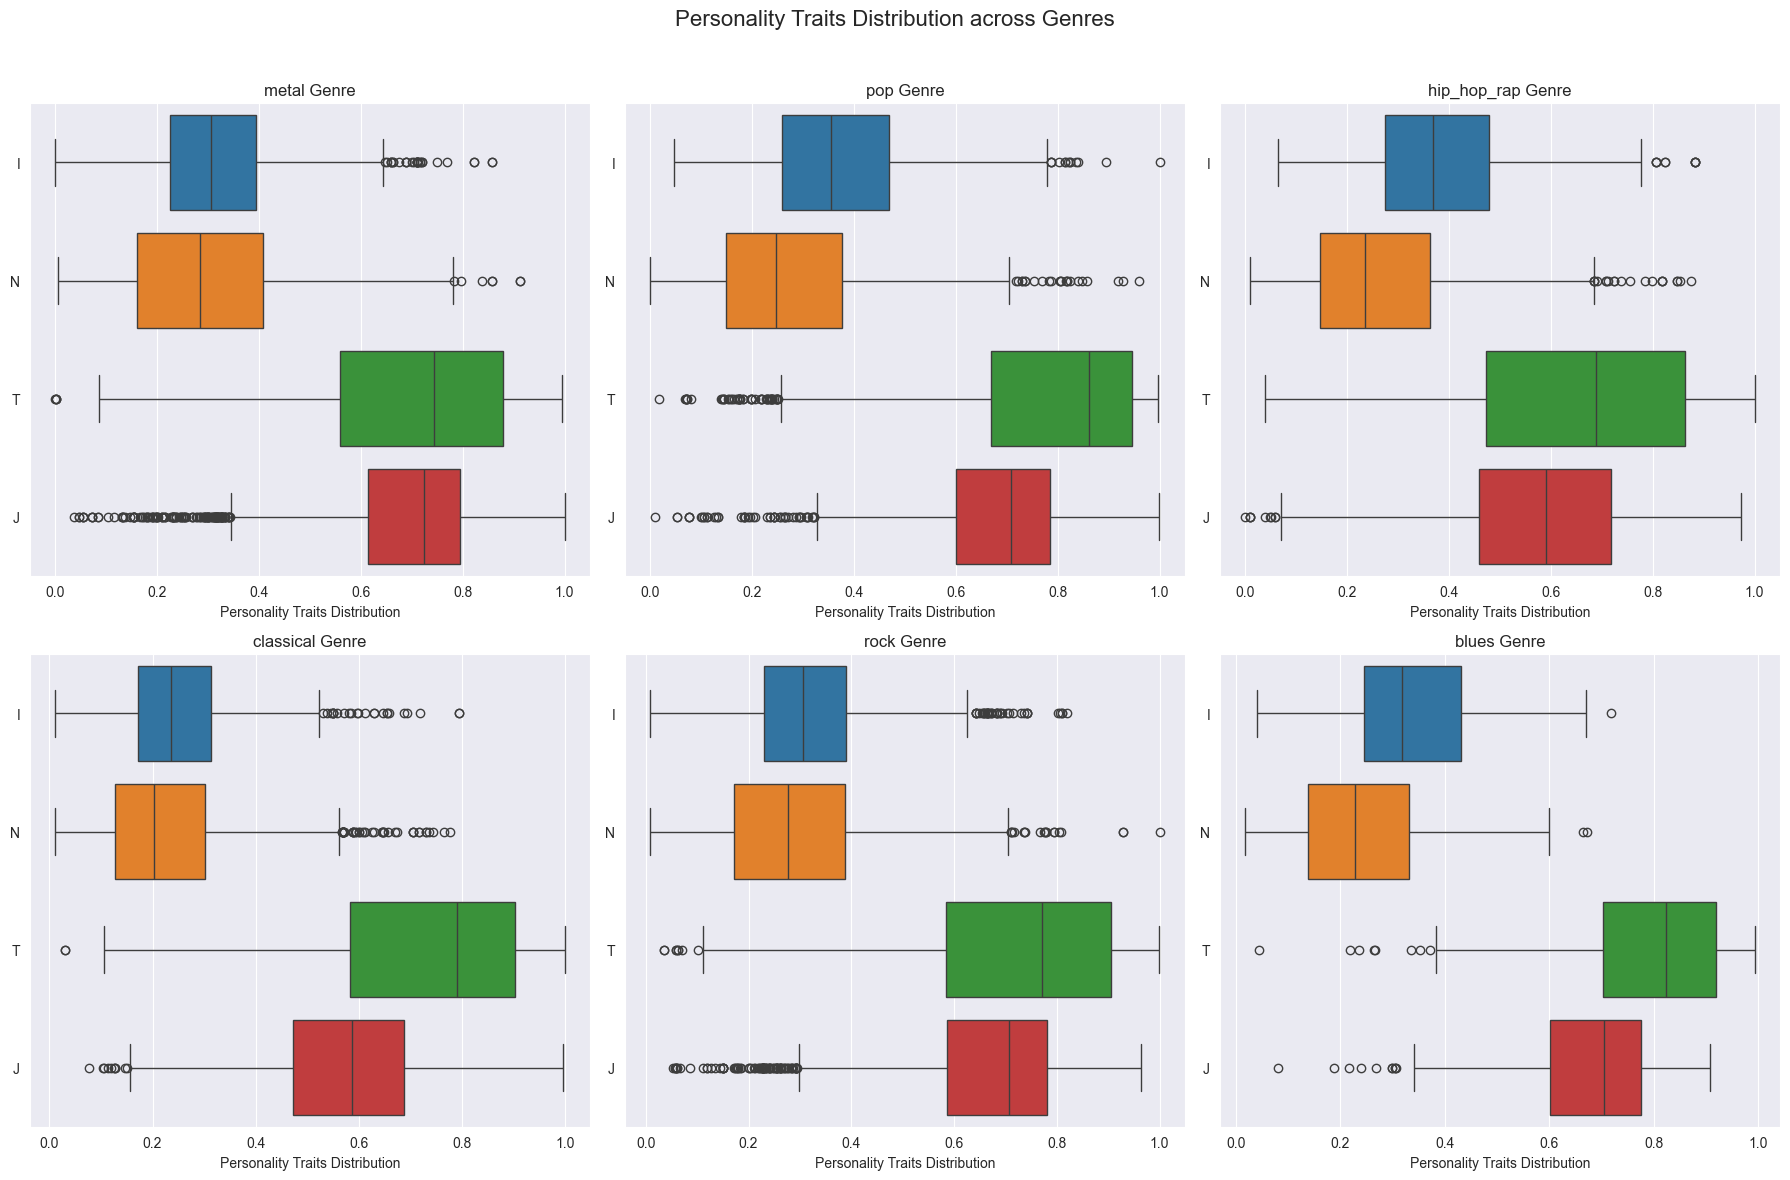

In [34]:
personality_names = ["I", "N", "T", "J"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Personality Traits Distribution across Genres", fontsize=16)
genres = df_author_mean_personality_genre.genre.unique()
for genre, ax in zip(genres, axes.flatten()):
    genre_data = df_author_mean_personality_genre[
        df_author_mean_personality_genre["genre"] == genre
    ][personality_names]
    sns.boxplot(data=genre_data, orient="h", ax=ax)
    ax.set_title(f"{genre} Genre")
    ax.set_xlabel("Personality Traits Distribution")

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.savefig(os.path.join(data_dir, "images", "personality_traits_genres.png"), dpi=400)
plt.show()

Artist printing:   0%|          | 0/30 [00:00<?, ?it/s]

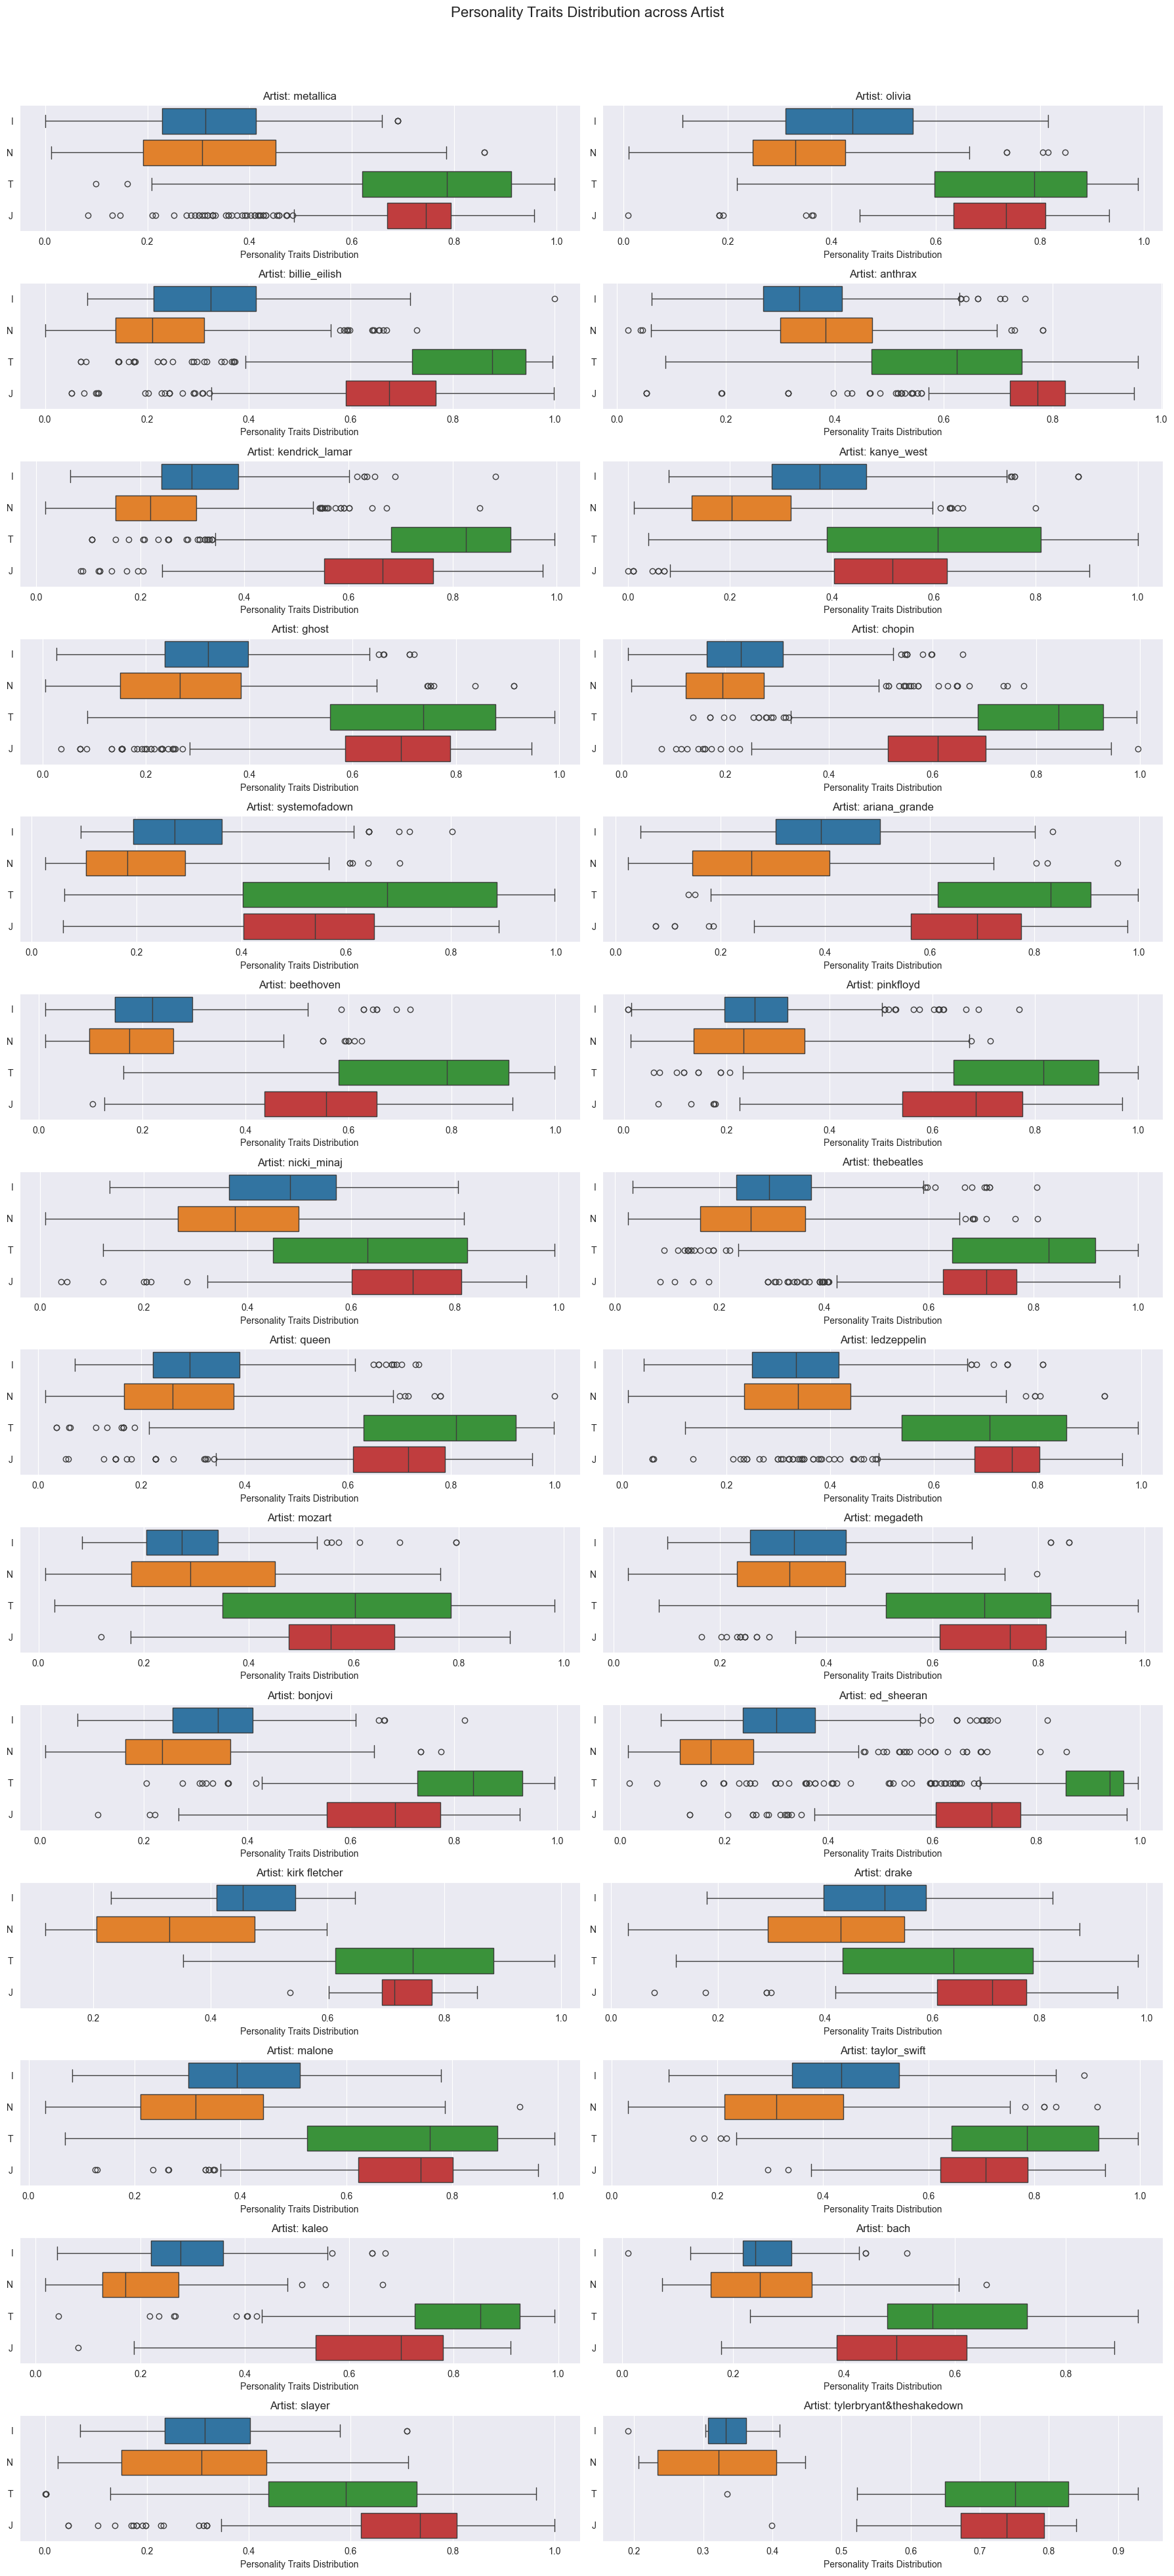

In [35]:
channels = df_author_mean_personality_genre.channel.unique()
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(18, 40))
fig.suptitle("Personality Traits Distribution across Artist", fontsize=16)

for channel, ax in tqdm(
    zip(channels, axes.flatten()),
    total=len(channels),
    desc="Artist printing",
    colour="green",
):
    channel_data = df_author_mean_personality_genre[
        df_author_mean_personality_genre["channel"] == channel
    ][personality_names]
    sns.boxplot(data=channel_data, orient="h", ax=ax)
    ax.set_title(f"Artist: {channel}")
    ax.set_xlabel("Personality Traits Distribution")

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.savefig(os.path.join(data_dir, "images", "personality_traits_artists.png"), dpi=400)
plt.show()

Artist printing:   0%|          | 0/4 [00:00<?, ?it/s]

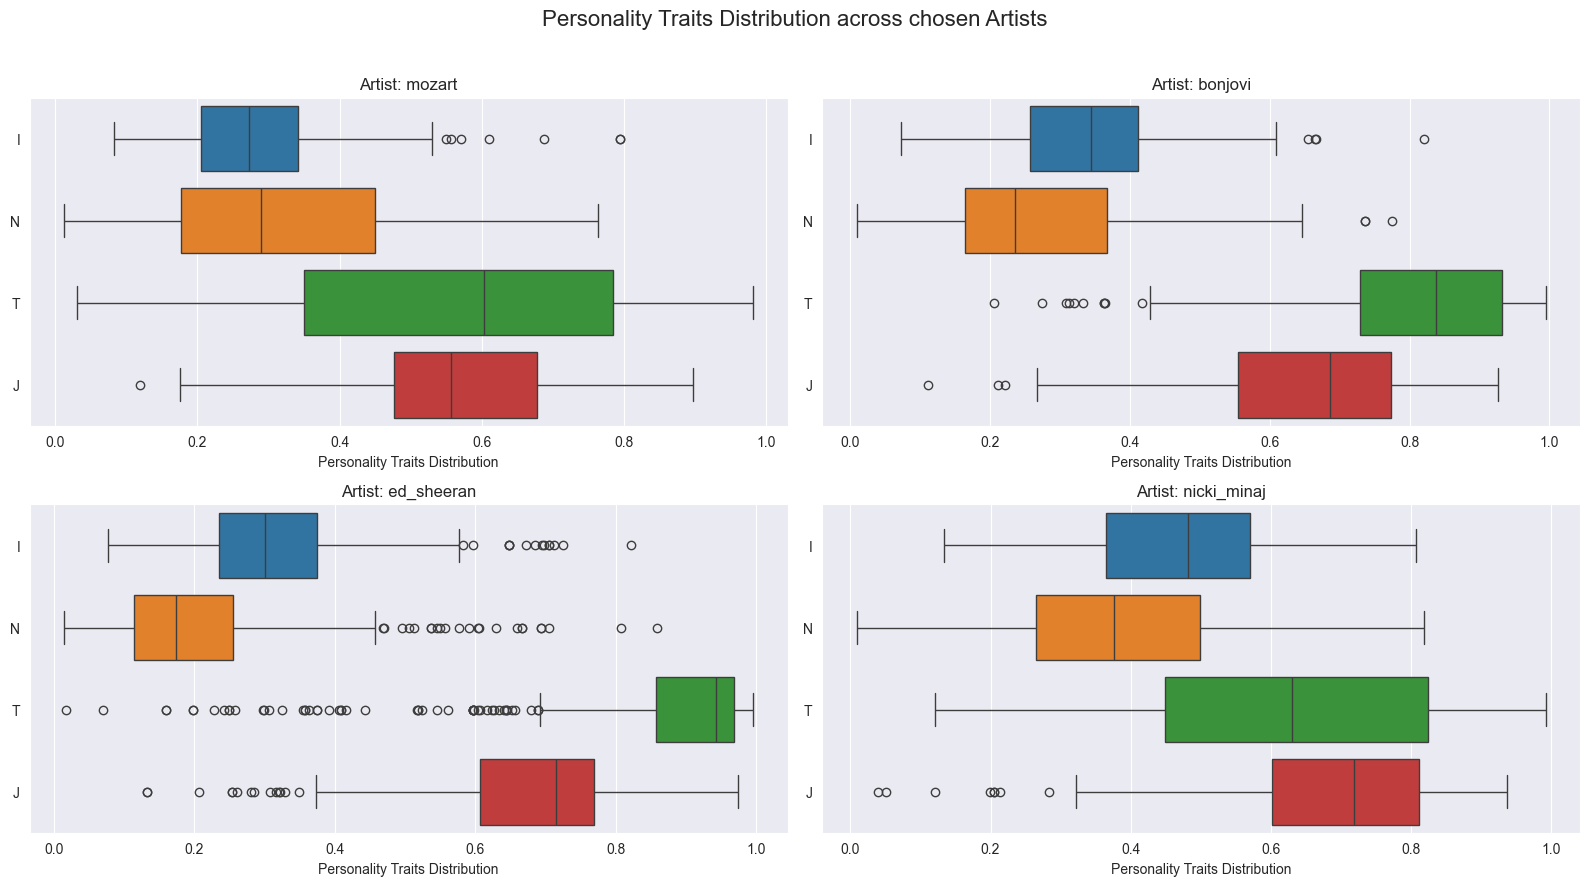

In [36]:
channels = ["mozart", "bonjovi", "ed_sheeran", "nicki_minaj"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))
fig.suptitle("Personality Traits Distribution across chosen Artists", fontsize=16)

for channel, ax in tqdm(
    zip(channels, axes.flatten()),
    total=len(channels),
    desc="Artist printing",
    colour="green",
):
    channel_data = df_author_mean_personality_genre[
        df_author_mean_personality_genre["channel"] == channel
    ][personality_names]
    sns.boxplot(data=channel_data, orient="h", ax=ax)
    ax.set_title(f"Artist: {channel}")
    ax.set_xlabel("Personality Traits Distribution")

plt.tight_layout(rect=(0, 0, 1, 0.96))

plt.savefig(os.path.join(data_dir, "images", "personality_traits_chosen_artists.png"), dpi=400)
plt.show()